# PRATICA_INDEPENDENTE - Pandas 2.

## Introdução

### Contexto:

#### Esse conjunto de dados é um registro de cada edifício ou unidade de edifício (apartamento etc.) vendidos no mercado imobiliário de Nova York durante um período de 12 meses.

### Conteúdo:

#### Esse dataset contem o local (location), endereço (address), tipo (type), preço de venda (sale price) e data de venda (sale date) de unidades do edifício. Veja a seguir algumas referências  sobre os campos:

* BOROUGH: Um código para definir o bairro em que a propriedade está localizada:
    - Manhattan (1), 
    - Bronx (2), 
    - Brooklyn (3), 
    - Queens (4), 
    - Staten Island (5).

* BLOCK; LOT: A combinação do bairro "borough", bloco "block", e lote "lot" forma uma chave única para a propriedade em New York City. Chamado de BBL.

* BUILDING CLASS AT PRESENT e BUILDING CLASS AT TIME OF SALE: O tipo de edifício em vários pontos no tempo. Veja o glossário abaixo:

#### Para referência adicional em campos individuais, consulte o [Glossário de Termos](https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf). Para os códigos de classificação de construção, consulte o Glossário de classificações de construção de [NYC Property Sales](https://www.kaggle.com/new-york-city/nyc-property-sales).

## Importamos os pacotes necessários e carregamos os dados.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [3]:
data = pd.read_csv('/content/nyc-rolling-sales_twentieth.csv')

In [ ]:
# Imprime uma amostra com 3 instâncias fazendo a transposição do DataFrame
data.sample(3).T

,10873,7372,6869
Unnamed: 0,10877,7376,6873
BOROUGH,1,1,1
NEIGHBORHOOD,SOHO,MIDTOWN CBD,LOWER EAST SIDE
BUILDING CLASS CATEGORY,45 CONDO HOTELS,13 CONDOS - ELEVATOR APARTMENTS,10 COOPS - ELEVATOR APARTMENTS
TAX CLASS AT PRESENT,4,2,2
BLOCK,491,1292,315
LOT,1504,1422,1
EASE-MENT,,,
BUILDING CLASS AT PRESENT,RH,R4,D4
ADDRESS,246 SPRING STREET,432 PARK AVENUE,"264 EAST BROADWAY, C303"


### Exercício 1: Avalie os [tipos](https://realpython.com/python-data-types/#type-conversion) das colunas e faça as alterações necessárias.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      16909 non-null  int64 
 1   BOROUGH                         16909 non-null  int64 
 2   NEIGHBORHOOD                    16909 non-null  object
 3   BUILDING CLASS CATEGORY         16909 non-null  object
 4   TAX CLASS AT PRESENT            16909 non-null  object
 5   BLOCK                           16909 non-null  int64 
 6   LOT                             16909 non-null  int64 
 7   EASE-MENT                       16909 non-null  object
 8   BUILDING CLASS AT PRESENT       16909 non-null  object
 9   ADDRESS                         16909 non-null  object
 10  APARTMENT NUMBER                16909 non-null  object
 11  ZIP CODE                        16909 non-null  int64 
 12  RESIDENTIAL UNITS               16909 non-null

Irei retirar colunas que não fazem sentido manter pra análise e que se deixadas irão demandar maior processamento e memória:

`Unnamed: 0`  - Já temos os índices pra identificação de cada linha

`APARTMENT NUMBER` - Número do apartamento

`ZIP CODE` - Código postal

 `EASE-MENT` - Coluna sem valores preenchidos



In [12]:
colunas_para_excluir = ['Unnamed: 0', 'APARTMENT NUMBER', 'ZIP CODE', 'EASE-MENT']

data.drop(columns= colunas_para_excluir, inplace=True)

In [13]:
# Conferindo se as colunas foram excluídas
data.sample().T

,8842
BOROUGH,1
NEIGHBORHOOD,MIDTOWN EAST
BUILDING CLASS CATEGORY,45 CONDO HOTELS
TAX CLASS AT PRESENT,4
BLOCK,1319
LOT,1360
BUILDING CLASS AT PRESENT,RH
ADDRESS,205 EAST 45TH STREET
RESIDENTIAL UNITS,0
COMMERCIAL UNITS,0


LAND SQUARE FEET, GROSS SQUARE FEET e SALE PRICE estão como `object`. 
Como vamos operar matematicamente sobre eles, vamos tranformá-los em tipos numéricos.
 

### Vamos alterar os tipos de algumas colunas.

Existem algumas linhas preenchidas com ' - ' (traço) nas colunas que queremos passar para tipos numéricos.

Por isso precisamos retirá-los antes com a função do objeto Series pandas [`.to_numeric()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html#pandas.to_numeric) que modifica os valores da Series passada como argumento para numéricos se possível.

Para resolver o problema dos traços como valores faltantes usamos o parâmetro `erros= 'coerce'` que passa os valores não numéricos encontrados para NaN.

In [14]:
colunas_para_limpar = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

In [15]:
for coluna in colunas_para_limpar:
  data[coluna]= pd.to_numeric(data[coluna], errors='coerce')

### Vamos eliminar as linhas que contêm valores `NaN`.

Contando quantos valores NaN há em cada coluna

In [16]:
data.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  15178
GROSS SQUARE FEET                 15288
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         3514
SALE DATE                             0
dtype: int64

Excluindo valores NaN

In [17]:
data.dropna(inplace= True)

Verificando a modificação no tipo dos objetos das colunas e o corte de valores NaN.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 0 to 16761
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         933 non-null    int64  
 1   NEIGHBORHOOD                    933 non-null    object 
 2   BUILDING CLASS CATEGORY         933 non-null    object 
 3   TAX CLASS AT PRESENT            933 non-null    object 
 4   BLOCK                           933 non-null    int64  
 5   LOT                             933 non-null    int64  
 6   BUILDING CLASS AT PRESENT       933 non-null    object 
 7   ADDRESS                         933 non-null    object 
 8   RESIDENTIAL UNITS               933 non-null    int64  
 9   COMMERCIAL UNITS                933 non-null    int64  
 10  TOTAL UNITS                     933 non-null    int64  
 11  LAND SQUARE FEET                933 non-null    float64
 12  GROSS SQUARE FEET               93

####Problema muito grande com o dataset. Existiam muitos `valores faltantes`preenchidos com traço para variáveis importantes de análise. 

De 16.909 instâncias, após limparmos os dados possuímos somente 933. 

### Qual é o valor médio do metro quadrado em NY?

Preciso passar a medida square feet como está no dataset para metros quadrados.

A [`fórmula`](https://www.asknumbers.com/square-feet-to-square-meter.aspx) dessa conversão é a multiplicação de square feet por 0.09290304 e aí obtemos o valor em metros quadrados.

A partir de uma função vou criar uma nova coluna com os metros quadrados pra resolução dos próximos exercícios

In [20]:
def converte_pes_para_metros(dados, coluna_pes):
  dados['SQUARED METERS']= round(dados[coluna_pes] * 0.09290304, 2)

Convertendo valores em pés para metros quadrados em nossos dados

In [21]:
converte_pes_para_metros(dados= data, coluna_pes= 'LAND SQUARE FEET')
data['SQUARED METERS'].head()

0    151.71
3    211.08
4    220.09
6    162.58
9    417.04
Name: SQUARED METERS, dtype: float64

Calculando a media de metros quadrados das instâncias

In [22]:
media = data['SQUARED METERS'].sum() / len(data['SQUARED METERS'])
print(f'A media dos metros quadrados é: {media:.2f}m²')

A media dos metros quadrados é: 531.31m²


### Qual o preço médio por metro quadrado de cada `BLOCK`? Organizar os dados para indicar qual é o mais caro.
Nota: fazer o cálculo tanto com groupby como com pivot tables

Calculando o preço por metro quadrado de cada instância

In [23]:
data['PRICE PER SQUARED METERS']= data['SQUARED METERS'] / data['SALE PRICE']

In [24]:
data['PRICE PER SQUARED METERS'].head()

0    0.000023
3    0.000054
4    0.000028
6    0.000051
9    0.000026
Name: PRICE PER SQUARED METERS, dtype: float64

####Organizando o preco medio quadrado por cada bloco com a função [`.pivot table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [25]:
preco_cada_metro_por_bloco = pd.pivot_table(data= data, values= 'PRICE PER SQUARED METERS', index= 'BLOCK')

Os cinco blocos mais caros são: 

2238; 599; 1468, 1773 e 1553.

In [26]:
# Mostrando os cinco blocos com o preco de cada metro quadrado maiores
preco_cada_metro_por_bloco.sort_values(by= 'PRICE PER SQUARED METERS', ascending= False).head()

,PRICE PER SQUARED METERS
BLOCK,
2238,696.770000
599,641.923000
1468,474.595018
1773,234.390000
1553,233.885021


### Em qual `BLOCK` há maior dispersão de preços por metro quadrado? Organizar os valores para identificar o maior.

(Lembrar da fórmula do coeficiente de variação para medir a dispersão)

In [28]:
# Calculando o desvio padrão do preço por metro quadrado de cada bloco
desvio_padrao_preco_por_bloco = data.groupby(by= 'BLOCK')['PRICE PER SQUARED METERS'].std()

In [29]:
# Calculando a media do preço por metro quadrado de cada bloco
media_preco_por_bloco =  data.groupby(by= 'BLOCK')['PRICE PER SQUARED METERS'].mean()

In [30]:
# Calculando a dispersão do preço por metro quadrado de cada bloco
dispersao_preco_por_bloco = desvio_padrao_preco_por_bloco / media_preco_por_bloco

In [33]:
# Imprimindo os cinco valores com maior dispersão de preços por metros quadrados
dispersao_preco_por_bloco.sort_values(ascending= False).head()

BLOCK
1009    3.367344
1911    2.249186
1687    2.235996
2064    1.999858
2060    1.999589
Name: PRICE PER SQUARED METERS, dtype: float64

### Em qual bairro os apartamentos são maiores? 
Nota: o cálculo pode ser feiro tanto com groupby como com pivot tables

In [35]:
# Usando o .groupby()
data.groupby(by= 'BOROUGH')['SQUARED METERS'].sum().sort_values(ascending= False)

BOROUGH
1    495708.51
Name: SQUARED METERS, dtype: float64

In [36]:
# Usando o .pivot_table()
pd.pivot_table(data, values= 'SQUARED METERS', index= 'BOROUGH', 
               aggfunc= 'sum').sort_values(by= 'SQUARED METERS', ascending= False)

,SQUARED METERS
BOROUGH,
1,495708.51


Temos dados de qual bairro em nosso dataset?

In [37]:
data['BOROUGH'].unique()

array([1])

De acordo com o dicionário dos valores, o valor 1 representa as instâncias do bairro de Manhatan. No dataset passado, só temos instâncias do bairro de Manhatan. O que diminui as nossas possibilidades de levantar hipóteses a partir de métodos estatísticos para toda a cidade de Nova Iorque, já que temos somente dados de um bairro da cidade americana.

### Em geral, você pode ver alguma diferença entre o preço médio por metro quadrado dos apartamentos, considerando seu ano de construção? o que você pode dizer sobre a relação entre o ano de construção e o tamanho total médio dos mesmos em pés quadrados?

Ano de Construção e Preço por metro quadrado

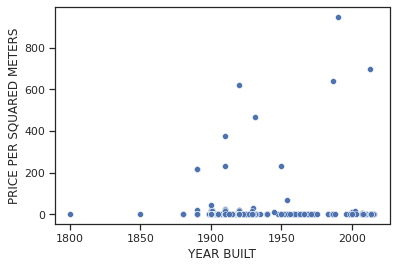

In [38]:
sns.scatterplot(data=data, x= 'YEAR BUILT', y= 'PRICE PER SQUARED METERS')
plt.show()

In [39]:
data[['YEAR BUILT', 'PRICE PER SQUARED METERS']].corr()

,YEAR BUILT,PRICE PER SQUARED METERS
YEAR BUILT,1.000000,0.091508
PRICE PER SQUARED METERS,0.091508,1.000000


Existem alguns valores bem próximos a zero devido ao baixo valor que possuem em preço medio por metro quadrado, mas não são zeros.

Ao olharmos tanto o gráfico de dispersão (scatterplot) e a matriz de correlação entre as duas variáveis, não nos é indicado que existe correlação (nem positiva e nem negativa) entre as duas variáveis.

Levando inclusive esses valores em consideração, não conseguimos ver uma relação entre essas duas variáveis, mas conseguimos perceber que no dataset existe muitas casas com valores medios bem baixos por metro quadrado.



Ano de Construção e Pés Quadrados

In [40]:
data[['YEAR BUILT', 'LAND SQUARE FEET']].corr()

,YEAR BUILT,LAND SQUARE FEET
YEAR BUILT,1.000000,0.251466
LAND SQUARE FEET,0.251466,1.000000


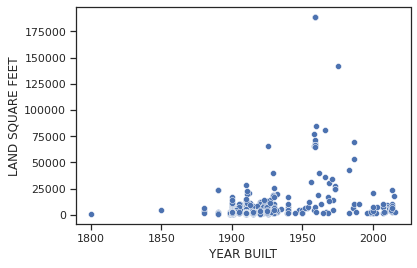

In [41]:
sns.scatterplot(data=data, x= 'YEAR BUILT', y= 'LAND SQUARE FEET')
plt.show()

Ao olharmos tanto o gráfico de dispersão (scatterplot) e a matriz de correlação entre as duas variáveis, não nos é indicado que existe correlação (nem positiva e nem negativa) entre as duas variáveis.

### Gere um `DataFrame` que acrescente a informação por (`PRICE PER SQUARE FEET`), unidades residenciais (`RESIDENTIAL UNITS`) e unidades comerciais (`COMMERCIAL UNITS`) por `BLOCK` e vizinhança (`NEIGHBORHOOD`). Forneça informações sobre a tendência central e a dispersão de ambas as distribuições.

####Agrupados por Bloco:

In [42]:
agrupado_por_blocos = pd.pivot_table(data, index= 'BLOCK',
                         values= ['PRICE PER SQUARED METERS', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS'])

In [44]:
agrupado_por_blocos.describe()

,COMMERCIAL UNITS,PRICE PER SQUARED METERS,RESIDENTIAL UNITS
count,538.000000,538.000000,538.000000
mean,3.118517,5.879077,16.881174
std,18.339166,49.437409,59.074072
min,0.000000,0.000002,0.000000
25%,0.000000,0.000019,1.000000
50%,1.000000,0.000032,4.500000
75%,2.000000,0.000076,15.000000
max,318.000000,696.770000,894.000000


`Unidades Comerciais:`

Podemos perceber que a distribuição de unidades comerciais por blocos possui bastantes dados dispersos (longes da média) e com a maioria das instâncias (75%) concentradas abaixo de duas unidades comerciais.


`Preço por metros quadrados:`

Também nos é indicado alta dispersão em preços por metros quadrados e com a maioria dos dados situados em valores abaixo de 0.000076, ou seja, com valores bem baixos de preços medios por metro quadrado.


`Unidades residenciais:`

Altíssima dispersão estando a maioria das instâncias situadas abaixo de 15 unidades residenciais por bloco.

####Agrupados por vizinhança

In [45]:
agrupado_por_vizinhanca = pd.pivot_table(data, index= 'NEIGHBORHOOD',
                         values= ['PRICE PER SQUARED METERS', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS'])

In [46]:
agrupado_por_vizinhanca.describe()

,COMMERCIAL UNITS,PRICE PER SQUARED METERS,RESIDENTIAL UNITS
count,35.000000,35.000000,35.000000
mean,3.917734,4.542802,18.978407
std,7.476231,9.318789,20.960563
min,0.000000,0.000010,0.000000
25%,0.629630,0.000081,6.557143
50%,1.133333,0.500141,12.000000
75%,3.071429,2.506027,20.170068
max,38.000000,38.709732,98.750000


A distribuição dos dados de Unidades Comerciais, Preço por metro quadrado e Unidades Residenciais agrupados por vizinhança demonstra mais homogeneidade. Possui também, menos instâncias (35) do que os blocos (538). O que é natural já que uma mesma vizinhança possui vários blocos.
 